# Preguntas Teóricas


*   **¿Qué es un paradigma de programación?**

El paradigma de la programación hace referencia a la forma en que se modelan los problemas que se desean resolver, desde la programación. Dentro de estos paradigmas se encuentra la programación imperativa, y la declarativa. La primera se enfoca en indicar explícitamente los pasos que se toman a la máquina, mientras que la segunda solo otorga el resultado sin explicar su metodología.

*   **¿En qué se basa la programación orientada a objetos?**

La programación orientada a objetos es uno de los paradigmas de programación imperativos. A través de la abstracción de datos, y la agrupación de información se busca organizar programas modulares y representar el mundo real. Es un programa hecho de clases, con campos y métodos propios.

*   **¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación big 𝑂?**

Los bucles iterativos hacen referencia a la repetición de procedimientos. Mientras que la recursión consiste una función que se llama a si misma, directa o indirectamente. La iteración es un caso especial de recursión. La notación Big O es una herramienta la cual permite analizar la eficiencia de los algoritmos. Por lo que la relación entre estas funciones con este algoritmo en según el número de entradas con el que se trabaje, unas funciones tendrán mejor eficiencia que otras. 

*   **Diferencia de rendimiento entre 𝑂(1) y 𝑂(𝑛)**

La diferencias viene de que el rendimiento de un algoritmo de orden O(1), posee un perfil plano a la hora de trabajar con más datos, es decir, se demora siempre lo mismo. Mientras que un algortimo de orden O(n), se tiene que a la hora de trabajar con un número mayor de datos o iteraciones, el tiempo de demora de la resolución del problema, aumenta de manera exponencial.

*   **¿Cómo se calcula el orden en un programa que funciona por etapas?**

Para calcular el orden de complejidad en un programa que funciona por etapas, primero se analiza la complejidad de cada etapa por separado. Dado que las etapas se ejecutan secuencialmente, la complejidad total del programa se determina por la etapa más costosa.


*   **¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?**

Para determinar la complejidad temporal de un algoritmo recursivo, se debe analizar la ecuación de recurrencia que describe cómo el tiempo de ejecución del algoritmo se descompone en términos de sus llamadas recursivas. Esto implica identificar el número de subproblemas generados en cada llamada recursiva y el costo de resolver cada uno de estos subproblemas. Una vez que se establece la ecuación de recurrencia, se puede resolver utilizando técnicas como la sustitución, el método de expansión o el teorema maestro para obtener la complejidad en notación Big O.



In [1]:
import math
import time
import matplotlib.pyplot as plt

In [29]:
class caminos:
    def __init__(self, N, M):  #M el largo de la grilla, y N el ancho
        self.largo = M
        self.ancho = N


    def medir_tiempo(func):
        def envoltorio(self, *args, **kwargs):
            inicio = time.time()
            resultado = func(self, *args, **kwargs)
            fin = time.time()
            delta_t = float(fin - inicio)
            return resultado, delta_t
        return envoltorio


    @medir_tiempo
    def combinatoria(self): #Usamos el coeficiente binimial

        if (self.ancho != 0 and self.largo != 0):
            return int(math.factorial(self.largo+self.ancho)/(math.factorial(self.largo)*math.factorial(self.ancho)))
        else: return "Grilla no válida"

    @medir_tiempo
    def iterativo(self):

        dp = [[0] * (self.ancho+1) for _ in range(self.largo+1)] #Tabla de (m+1) x (n+1)
        #Direcciones
        for i in range(self.largo+1):
            dp[i][0] = 1  # Solo un camino hacia abajo
        for j in range(self.ancho+1):
            dp[0][j] = 1  # Solo un camino hacia la derecha


        for i in range(1, self.largo+1): # Llenar tabla
            for j in range(1, self.ancho+1):
                dp[i][j] = dp[i-1][j] + dp[i][j-1]  # Caminos desde arriba y la izquierda

        # El número de caminos hacia la esquina inferior derecha
        return int(dp[self.largo][self.ancho])

    @medir_tiempo
    def recursivo(self):
        def caminos_recursivos(largo, ancho):
            if largo == 0 or ancho == 0:
                return 1
            return caminos_recursivos(largo - 1, ancho) + caminos_recursivos(largo, ancho - 1)

        return caminos_recursivos(self.largo, self.ancho)

    def metodo(self,func):
        if func=="iterativo":
            return self.iterativo()
        if func=="recursivo":
            return self.recursivo()
        if func=="combinatoria":
            return self.combinatoria()
        else: return "Método no válido"


In [ ]:
valor=caminos(9,2)
valor.metodo("iterativo")
valor.metodo("combinatoria")
valor.metodo("recursivo")

: 

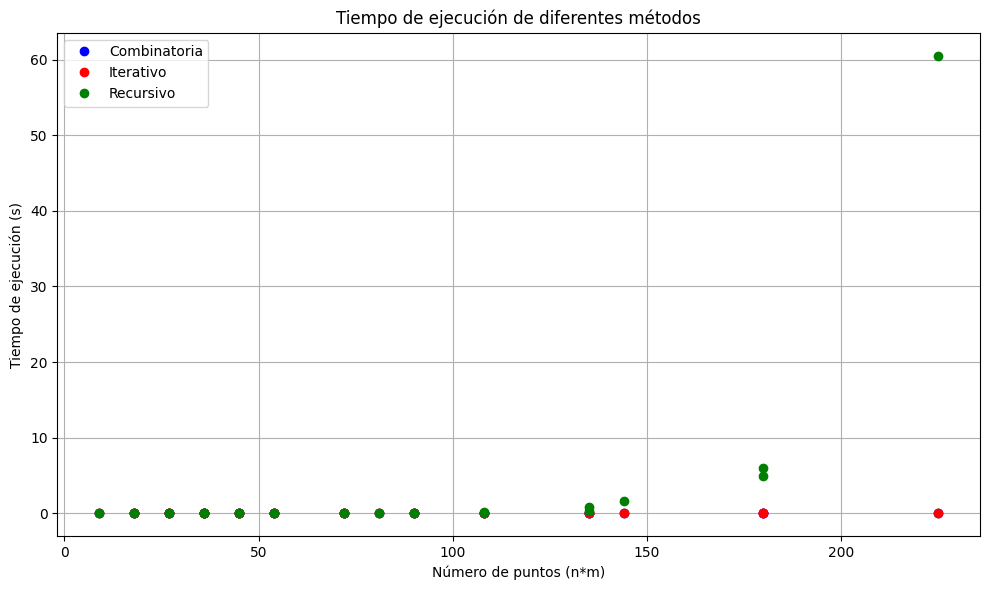

In [28]:
# Rango de valores para n y m
n_values = list(range(3, 16, 3))  # Ancho
m_values = list(range(3, 16, 3))  # Largo

# Listas para almacenar tiempos de ejecución
tiempos_combinatoria = []
tiempos_iterativo = []
tiempos_recursivo = []

# Medir tiempos de ejecución para diferentes valores de (n, m)
for n in n_values:
    for m in m_values:
        valor = caminos(n, m)
        _, tiempo_combinatoria = valor.combinatoria()
        _, tiempo_iterativo = valor.iterativo()
        _, tiempo_recursivo = valor.recursivo()
        num_puntos = n * m
        tiempos_combinatoria.append((num_puntos, tiempo_combinatoria))
        tiempos_iterativo.append((num_puntos, tiempo_iterativo))
        tiempos_recursivo.append((num_puntos, tiempo_recursivo))

# Convertir listas a arrays para gráficos
num_puntos_com, tiempos_comb = zip(*tiempos_combinatoria)
num_puntos_iter, tiempos_iter = zip(*tiempos_iterativo)
num_puntos_rec, tiempos_rec = zip(*tiempos_recursivo)

# Graficar tiempos de ejecución
plt.figure(figsize=(10, 6))

plt.plot(num_puntos_com, tiempos_comb, 'o', label='Combinatoria', color='blue')
plt.plot(num_puntos_iter, tiempos_iter, 'o', label='Iterativo', color='red')
plt.plot(num_puntos_rec, tiempos_rec, 'o', label='Recursivo', color='green')

plt.xlabel('Número de puntos (n*m)')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Tiempo de ejecución de diferentes métodos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

De este gráfico se concluye entonces, que la complejidad de los métodos combinatoria y iteratividad es O(1), mientras que el de recursividad es de orden O(n)